### Fast Fourier Transform 

In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
np.set_printoptions(suppress = True)

x = np.linspace(0, 2*np.pi, 16, endpoint = False)  # time domain sample values
print ('Time domain sample values：\n', x)
y = np.sin(2*x) + np.sin(3*x + np.pi/4)
# y = np.sin(x)



Time domain sample values：
 [ 0.          0.39269908  0.78539816  1.17809725  1.57079633  1.96349541
  2.35619449  2.74889357  3.14159265  3.53429174  3.92699082  4.3196899
  4.71238898  5.10508806  5.49778714  5.89048623]


In [32]:
N = len(x)
print ('Sample Size： \n', N)
print ('\n Original Signal：', y)  # y = sin(2x) + sin(3x + pi/4)
f = np.fft.fft(y)  # fast fourier transform

print ('\n Frequency Domain signal： \n', f/N)
a = np.abs(f/N)
print ('\n Frequency Modulus：', a)  # complex numbers 
# help(np.fft)
# help(np.abs)

Sample Size： 
 16

 Original Signal： [ 0.70710678  1.63098631  1.         -0.21677275 -0.70710678 -0.32442335
  0.         -0.32442335 -0.70710678 -0.21677275  1.          1.63098631
  0.70710678 -1.08979021 -2.         -1.08979021]

 Frequency Domain signal： 
 [-0.00000000+0.j         -0.00000000+0.j         -0.00000000-0.5j
  0.35355339-0.35355339j  0.00000000-0.j         -0.00000000+0.j
 -0.00000000-0.j          0.00000000-0.j          0.00000000+0.j
  0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
  0.00000000+0.j          0.35355339+0.35355339j  0.00000000+0.5j
 -0.00000000+0.j        ]

 Frequency Modulus： [ 0.   0.   0.5  0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.5  0.5
  0. ]


In [38]:
iy = np.fft.ifft(f)  # Inverse FFT 
print ('\n Reversed Signal：\n', iy)
print ('\n Imaginary part：', np.imag(iy))  # All zero
print ('\n Real part：\n', np.real(iy))
print ('\n If the reversed signal is the same as the original ：', np.allclose(np.real(iy), y))


 Reversed Signal：
 [ 0.70710678+0.j  1.63098631+0.j  1.00000000-0.j -0.21677275-0.j
 -0.70710678+0.j -0.32442335+0.j  0.00000000-0.j -0.32442335+0.j
 -0.70710678-0.j -0.21677275+0.j  1.00000000+0.j  1.63098631-0.j
  0.70710678-0.j -1.08979021-0.j -2.00000000+0.j -1.08979021+0.j]

 Imaginary part： [ 0.  0. -0. -0.  0.  0. -0.  0. -0.  0.  0. -0. -0. -0.  0.  0.]

 Real part：
 [ 0.70710678  1.63098631  1.         -0.21677275 -0.70710678 -0.32442335
  0.         -0.32442335 -0.70710678 -0.21677275  1.          1.63098631
  0.70710678 -1.08979021 -2.         -1.08979021]

 If the reversed signal is the same as the original ： True


Frequency samples： [ 0.          0.06283185  0.12566371  0.18849556  0.25132741  0.31415927
  0.37699112  0.43982297  0.50265482  0.56548668  0.62831853  0.69115038
  0.75398224  0.81681409  0.87964594  0.9424778   1.00530965  1.0681415
  1.13097336  1.19380521  1.25663706  1.31946891  1.38230077  1.44513262
  1.50796447  1.57079633  1.63362818  1.69646003  1.75929189  1.82212374
  1.88495559  1.94778745  2.0106193   2.07345115  2.136283    2.19911486
  2.26194671  2.32477856  2.38761042  2.45044227  2.51327412  2.57610598
  2.63893783  2.70176968  2.76460154  2.82743339  2.89026524  2.95309709
  3.01592895  3.0787608   3.14159265  3.20442451  3.26725636  3.33008821
  3.39292007  3.45575192  3.51858377  3.58141563  3.64424748  3.70707933
  3.76991118  3.83274304  3.89557489  3.95840674  4.0212386   4.08407045
  4.1469023   4.20973416  4.27256601  4.33539786  4.39822972  4.46106157
  4.52389342  4.58672527  4.64955713  4.71238898  4.77522083  4.83805269
  4.90088454  4.96371639  5.02654

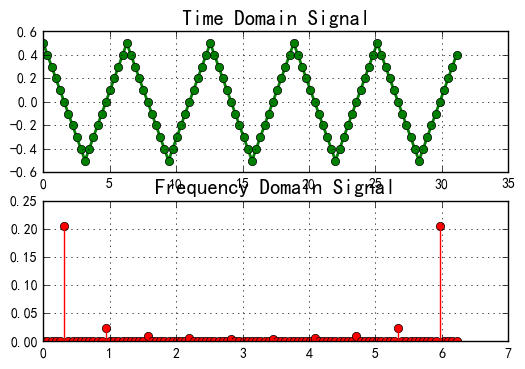

In [44]:
# Plot the results 
plt.subplot(211)  #       subplot(211) produces a subaxes in a figure which represents the top plot (i.e. the
plt.plot(x, y, 'go-', lw=2)
plt.title(u'Time Domain Signal', fontsize = 15)
plt.grid(True)
plt.subplot(212)
w = np.arange(N) * 2*np.pi / N
print (u'Frequency samples：', w)
plt.stem(w, a, linefmt='r-', markerfmt='ro') # Create a stem plot. a = np.abs(f/N) the modules of frequency domain sig
plt.title(u'Frequency Domain Signal', fontsize=15) 
plt.grid(True)
plt.show()
# help(plt.subplot)
# help(plt.stem)

In [60]:
# Trianglar waves 

def triangle_wave(size, T):
    t = np.linspace(-1, 1, size, endpoint = False)
    # where
    # y = np.where(t < 0, -t, 0)
    # y = np.where(t >= 0, t, y)
    y = np.abs(t)  # All positive 
    y = np.tile(y, T) - 0.5  # Construct an array by repeating y the number of times given by T.
    x = np.linspace(0, 2 * np.pi * T, size * T, endpoint = False)
    return x, y
# help(np.tile)


In [64]:
y = np.linspace(-1, 1, 20, endpoint = False)
print(y)
T = 5
y = np.abs(y)
print(y)
np.tile(y, T)

[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4
  0.5  0.6  0.7  0.8  0.9]
[ 1.   0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.2  0.1  0.   0.1  0.2  0.3  0.4
  0.5  0.6  0.7  0.8  0.9]


array([ 1. ,  0.9,  0.8,  0.7,  0.6,  0.5,  0.4,  0.3,  0.2,  0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  0.9,
        0.8,  0.7,  0.6,  0.5,  0.4,  0.3,  0.2,  0.1,  0. ,  0.1,  0.2,
        0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  0.9,  0.8,  0.7,
        0.6,  0.5,  0.4,  0.3,  0.2,  0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  0.9,  0.8,  0.7,  0.6,  0.5,
        0.4,  0.3,  0.2,  0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,
        0.7,  0.8,  0.9,  1. ,  0.9,  0.8,  0.7,  0.6,  0.5,  0.4,  0.3,
        0.2,  0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,
        0.9])

In [69]:
x, y = triangle_wave(20, 5)
print('x: \n', x)
print('y:\n', y)

x: 
 [  0.           0.31415927   0.62831853   0.9424778    1.25663706
   1.57079633   1.88495559   2.19911486   2.51327412   2.82743339
   3.14159265   3.45575192   3.76991118   4.08407045   4.39822972
   4.71238898   5.02654825   5.34070751   5.65486678   5.96902604
   6.28318531   6.59734457   6.91150384   7.2256631    7.53982237
   7.85398163   8.1681409    8.48230016   8.79645943   9.1106187
   9.42477796   9.73893723  10.05309649  10.36725576  10.68141502
  10.99557429  11.30973355  11.62389282  11.93805208  12.25221135
  12.56637061  12.88052988  13.19468915  13.50884841  13.82300768
  14.13716694  14.45132621  14.76548547  15.07964474  15.393804
  15.70796327  16.02212253  16.3362818   16.65044106  16.96460033
  17.27875959  17.59291886  17.90707813  18.22123739  18.53539666
  18.84955592  19.16371519  19.47787445  19.79203372  20.10619298
  20.42035225  20.73451151  21.04867078  21.36283004  21.67698931
  21.99114858  22.30530784  22.61946711  22.93362637  23.24778564
  23.561

In [51]:
def sawtooth_wave(size, T):
    t = np.linspace(-1, 1, size)
    y = np.tile(t, T)
    x = np.linspace(0, 2 * np.pi * T, size * T, endpoint = False)
    return x, y


def triangle_wave2(size, T):
    x, y = sawtooth_wave(size, T)
    return x, np.abs(y)


def non_zero(f):
    f1 = np.real(f)
    f2 = np.imag(f)
    eps = 1e-4
    return f1[(f1 > eps) | (f1 < -eps)], f2[(f2 > eps) | (f2 < -eps)]

N = len(y)
f = np.fft.fft(y)
# print '原始频域信号：', np.real(f), np.imag(f)
print ('Original Signal：', non_zero(f))  # print values with abs > 1e-4
a = np.abs(f / N)

原始频域信号： (array([ 20.43172909,   2.42592   ,   1.        ,   0.62980809,
         0.51254282,   0.51254282,   0.62980809,   1.        ,
         2.42592   ,  20.43172909]), array([], dtype=float64))
[  0.00000000+0.j  -0.00000000+0.j  -0.00000000+0.j   0.00000000+0.j
   0.00000000+0.j  20.43172909-0.j   0.00000000+0.j   0.00000000+0.j
   0.00000000+0.j   0.00000000+0.j   0.00000000-0.j   0.00000000+0.j
   0.00000000+0.j   0.00000000-0.j   0.00000000+0.j   2.42592000+0.j
   0.00000000+0.j   0.00000000+0.j   0.00000000-0.j   0.00000000+0.j
  -0.00000000-0.j   0.00000000-0.j   0.00000000-0.j   0.00000000+0.j
   0.00000000+0.j   1.00000000+0.j  -0.00000000-0.j   0.00000000+0.j
   0.00000000+0.j   0.00000000-0.j  -0.00000000-0.j  -0.00000000+0.j
   0.00000000+0.j   0.00000000-0.j   0.00000000-0.j   0.62980809+0.j
   0.00000000+0.j  -0.00000000+0.j  -0.00000000-0.j   0.00000000+0.j
  -0.00000000+0.j  -0.00000000+0.j   0.00000000-0.j   0.00000000+0.j
   0.00000000+0.j   0.51254282+0.j   0.0000

In [53]:
# np.real_if_close
f_real = np.real(f)
eps = 0.1 * f_real.max()
print ('eps: \n',eps)

eps: 
 2.04317290945


In [65]:
# cut the signal
f_real[(f_real < eps) & (f_real > -eps)] = 0
f_imag = np.imag(f)
eps = 0.1 * f_imag.max()
print ('eps:\n', eps) # eps for imaginary part 
f_imag[(f_imag < eps) & (f_imag > -eps)] = 0
f1 = f_real + f_imag * 1j
y1 = np.fft.ifft(f1)
y1 = np.real(y1)
print ('Reversed Signal：\n', non_zero(f1))

eps:
 6.31862387458e-16
Reversed Signal：
 (array([ 20.43172909,   2.42592   ,   2.42592   ,  20.43172909]), array([], dtype=float64))


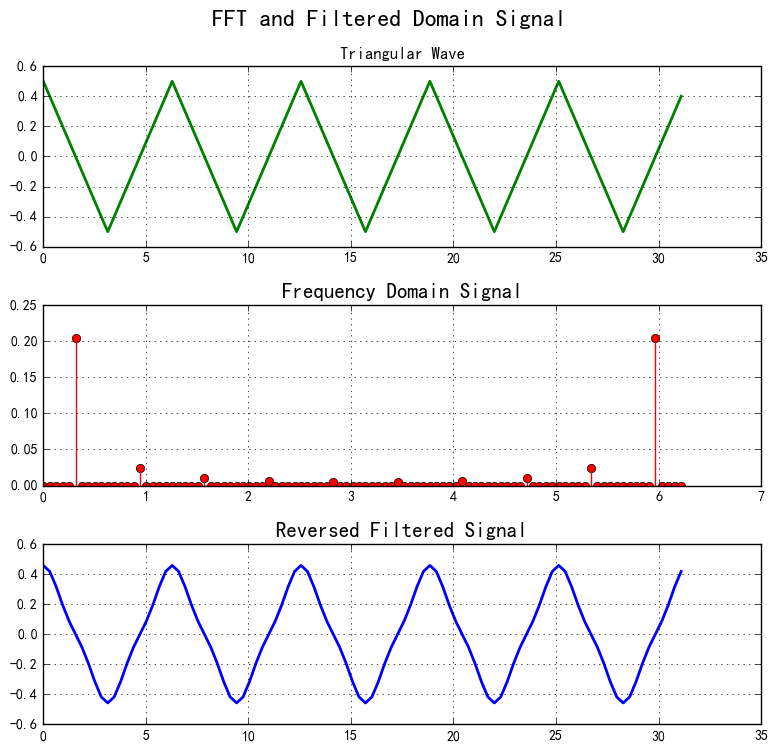

In [75]:
# x, y = sawtooth_wave(20, 5)

plt.figure(figsize=(8, 8), facecolor='w')
plt.subplot(311)
plt.plot(x, y, 'g-', lw=2)
plt.title('Triangular Wave')
plt.grid(True)
plt.subplot(312)
w = np.arange(N) * 2*np.pi / N
plt.stem(w, a, linefmt='r-', markerfmt='ro')
plt.title('Frequency Domain Signal', fontsize=15)
plt.grid(True)
plt.subplot(313)
plt.plot(x, y1, 'b-', lw=2, markersize=4)
plt.title('Reversed Filtered Signal', fontsize=15)
plt.grid(True)
plt.tight_layout(1.5, rect=[0, 0.04, 1, 0.96])
plt.suptitle('FFT and Filtered Domain Signal', fontsize=17)
plt.show()
